In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import sipmath as sm
import sipmath.pymetalog as pm

Basic SIPmath Demo

In [2]:
model = sm.sipmodel(10000, name='test_slurp', origin='colin made me', about='this is a test for sam')

input_1 = model.sipinput(distribution='normal', generator='hdr', name='normal distribution')
input_2 = model.sipinput(distribution='uniform', generator='rand', name='uniform distribution')

model.sample()

model.to_df().iloc[:5]

,normal distribution,uniform distribution
trial,,
0,0.583972,0.882936
1,0.822309,0.498653
2,-0.648388,0.102828
3,-0.412267,0.543067
4,-0.538774,0.493104


<function matplotlib.pyplot.show(*args, **kw)>

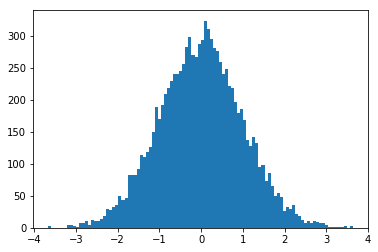

In [3]:
plt.hist(input_1, 100)
plt.show

Arithmetic works!

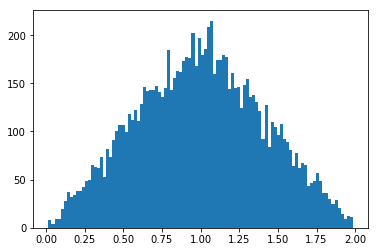

In [4]:
input_3 = model.sipinput(distribution='uniform')
model.sample()

plt.hist(input_2+input_3, 100)
plt.show()

Lets time some sampling...

In [5]:
model2 = sm.sipmodel(1000000)
input_21 = model2.sipinput(distribution='exponential')
input_22 = model2.sipinput(distribution='exponential')
input_23 = model2.sipinput(distribution='exponential')

start = time.time()
model2.sample()
end = time.time()
(end - start)

0.33446812629699707

300,000,000 individual samples in a small amount of time...

In [6]:
start = time.time()
elementwise_sum = input_21+input_22+input_23
end = time.time()
(end - start)

0.006620168685913086

Math on samples pretty fast

METALOG DISTRIBUTIONS - full functionality of RMetalog

{'pdf': <Figure size 432x288 with 8 Axes>,
 'cdf': <Figure size 432x288 with 8 Axes>}

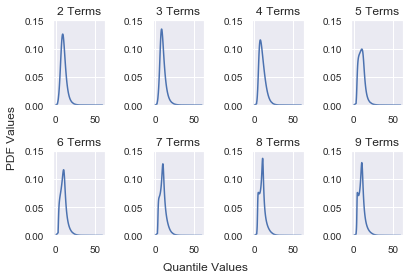

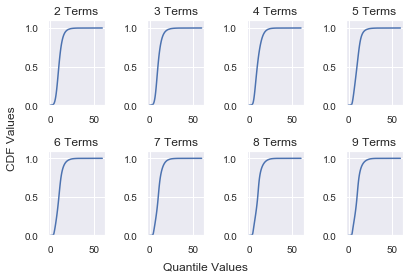

In [7]:
fish_data = np.loadtxt('sipmath/pymetalog/fishout.csv', delimiter=',', skiprows=1, dtype='str')[:,1].astype(np.float)

fish_metalog = pm.metalog(x=fish_data, bounds=[0,60], boundedness='b', step_len = 0.01, term_limit=9)

pm.plot(fish_metalog)

In [8]:
# quantile functions
pm.qmetalog(fish_metalog, y =[0.25,0.5,0.75], term = 9)

array([ 7.24062346,  9.8401392 , 12.06306122])

In [9]:
# percentile functions
pm.pmetalog(fish_metalog, q = [3, 10, 25], term = 9)

[0.00195673040356178, 0.520058262534555, 0.9922670337761582]

In [10]:
# density functions
pm.dmetalog(fish_metalog, q = [3, 10, 25], term = 9)

[0.00448950815711931, 0.12672435731148396, 0.0022643955290923483]

Metalogs can be SIP distributions...

<class 'sipmath.pymetalog.metalog.metalog'>


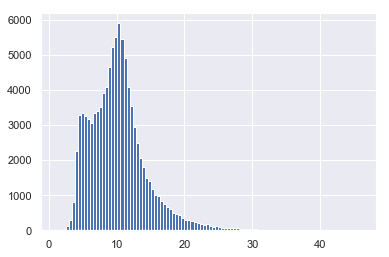

In [11]:
model3 = sm.sipmodel(100000, name='test_for_sam')

fish_sip = model3.sipinput(distribution='metalog', metalog=fish_metalog, term=9)

model3.sample()

plt.hist(fish_sip, 100)
plt.show()

Arithmetic can be performed on these sips just like any other...

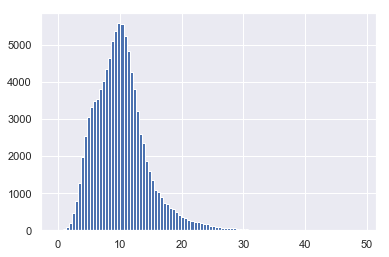

In [12]:
normal_sip = model3.sipinput(distribution='normal')
model3.sample()

plt.hist(normal_sip+fish_sip,100)
plt.show()

In [13]:
model3.to_xml('sam_test.xml')

In [14]:
#not yet working - xml to python translation
#model4 = sm.from_xml('path')